In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Kurs rozszerzony języka Python
## Propozycja projektu: Rozpoznawanie odręcznie napisanych cyfr
### Kod zaczerpnięty z [kursu sieci neuronowych](https://sites.google.com/a/cs.uni.wroc.pl/jch/teaching/nnets)
### 1. Jak zacząć?

1\. Należy ściągnąć i rozpakować dane MNIST (http://yann.lecun.com/exdb/mnist/)

2\. Teraz możemy załadować dane korzystając z załączonego modułu

In [2]:
from data import Dataset
dataset = Dataset('/home/i248100/train-images-idx3-ubyte', '/home/i248100/train-labels-idx1-ubyte')
train_dataset, dev_dataset = dataset.split(0.9)
test_dataset  = Dataset('/home/i248100/t10k-images-idx3-ubyte', '/home/i248100/t10k-labels-idx1-ubyte')

3\. Możemy sprawdzić przykładowe dane

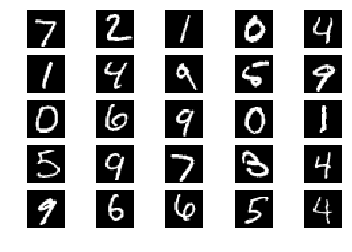

In [3]:
f, axarr = plt.subplots(5, 5)

for fx in xrange(5):
    for fy in xrange(5):
        axarr[fx, fy].imshow(test_dataset.data[fx*5 + fy], cmap='gray')
        axarr[fx,fy].set_axis_off()

4\. Teraz możemy zdefiniować sieć neuronową

In [4]:
from network import FeedForwardNet, AffineLayer, ReLULayer, SoftMaxLayer

In [31]:
net = FeedForwardNet([
        AffineLayer(784, 1000),
        ReLULayer(),
        AffineLayer(1000, 500),
        ReLULayer(),
        AffineLayer(500, 10),
        SoftMaxLayer()
        ])

5\. A następnie możemy ją wyuczyć

In [32]:
from trainer import SGD
SGD(net, train_dataset, dev_dataset)

At minibatch 100, batch loss 1.366394, batch error rate 40.625000%
At minibatch 200, batch loss 0.265215, batch error rate 9.375000%
At minibatch 300, batch loss 0.288051, batch error rate 9.375000%
At minibatch 400, batch loss 0.239003, batch error rate 3.125000%
At minibatch 500, batch loss 0.644905, batch error rate 12.500000%
At minibatch 600, batch loss 0.313076, batch error rate 6.250000%
At minibatch 700, batch loss 0.604138, batch error rate 15.625000%
At minibatch 800, batch loss 0.244512, batch error rate 3.125000%
At minibatch 900, batch loss 0.224041, batch error rate 3.125000%
At minibatch 1000, batch loss 0.063643, batch error rate 0.000000%
At minibatch 1100, batch loss 0.132345, batch error rate 3.125000%
At minibatch 1200, batch loss 0.288114, batch error rate 12.500000%
At minibatch 1300, batch loss 0.232058, batch error rate 9.375000%
At minibatch 1400, batch loss 0.231069, batch error rate 3.125000%
At minibatch 1500, batch loss 0.160721, batch error rate 6.250000%


In [33]:
from trainer import compute_error_rate
compute_error_rate(net, test_dataset)

0.024839743589743588

6\. A teraz damy jakiś przykład do rozpoznania dla sieci 

### Wprowadzenie obrazka do sieci

In [61]:
# Ładujemy obrazek, który ma wymiary (28, 28, 3)
image = imread('/home/i248100/3.png')
print(image.shape)

(28, 28, 3)


In [62]:
# Weżmy jedynie jedną ze składowych RGB, teraz mamy rzeczywiśćie obraz czarno-biały
image = image[..., 0]

In [65]:
# Normalizujemy obraz z [0,1] na [-1, 1]
image = (image * 2) - 1

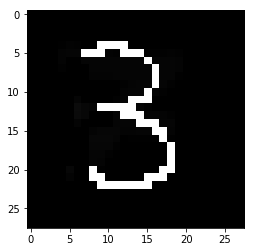

In [66]:
imshow(image, cmap='gray')

In [67]:
# Spłaszczamy obraz 28x28 -> 784. Dodatkowo sieć potrafi działać z kilkoma obrazkami jednocześnie
# dlatego musimy jej powiedzieć, że w tym przypadku ma tylko jeden przykład. Dlatego mamy image.reshape(784, 1)
result = net.fprop(image.reshape(784, 1))
print(result)

Shape: (10, 1)
[[  1.29197053e-08]
 [  3.45592525e-05]
 [  3.36455851e-05]
 [  9.98898625e-01]
 [  1.91318190e-06]
 [  8.11348262e-04]
 [  7.96192623e-08]
 [  3.14576005e-06]
 [  3.39711296e-05]
 [  1.82693650e-04]]


<Container object of 10 artists>

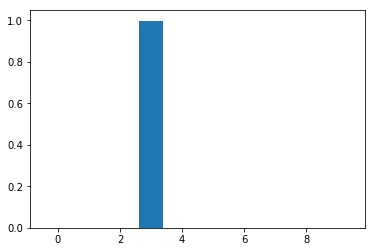

In [68]:
bar(arange(10), result[:,0])